In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("/content/all_stocks_5yr.csv")
df.head()
cols = ['high', 'low', 'volume']
df = df.drop(cols, axis=1)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   close   619040 non-null  float64
 3   Name    619040 non-null  object 
dtypes: float64(2), object(2)
memory usage: 18.9+ MB


In [4]:
def search_for_company(start_char):
  return [x for x in df['Name'].unique() if x.startswith(start_char)]

def search_company(start_char):
  company_list = search_for_company(start_char)
  print(company_list)
  company_name = input("Please select a name from the above list...")
  return df.loc[df['Name'].isin([company_name])]

In [5]:
updated_df = search_company(input('Want to know which company do we predict? Type any charachters to search for companies!'))

Want to know which company do we predict? Type any charachters to search for companies!AAL
['AAL']
Please select a name from the above list...AAL


In [6]:
updated_df

,date,open,close,Name
0,2013-02-08,15.07,14.75,AAL
1,2013-02-11,14.89,14.46,AAL
2,2013-02-12,14.45,14.27,AAL
3,2013-02-13,14.30,14.66,AAL
4,2013-02-14,14.94,13.99,AAL
...,...,...,...,...
1254,2018-02-01,54.00,53.88,AAL
1255,2018-02-02,53.49,52.10,AAL
1256,2018-02-05,51.99,49.76,AAL
1257,2018-02-06,49.32,51.18,AAL


In [7]:
training_set = updated_df.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from keras.layers import SimpleRNN
from keras.layers import GRU

SIMPLE RNN

In [11]:
regressorRnn = Sequential()
#LAYER 1
regressorRnn.add(SimpleRNN(units=50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressorRnn.add(Dropout(0.2))
#LAYER 2
regressorRnn.add(SimpleRNN(units=50, activation="relu", return_sequences=True))
regressorRnn.add(Dropout(0.2))
#LAYER 3
regressorRnn.add(SimpleRNN(units=50, activation="relu", return_sequences=True))
regressorRnn.add(Dropout(0.2))
#LAYER 4
regressorRnn.add(SimpleRNN(units=50))
regressorRnn.add(Dropout(0.2))
#OUTPUT LAYER
regressorRnn.add(Dense(units = 1))
regressorRnn.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])
regressorRnn.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 68ms/step - loss: 0.1448 - accuracy: 8.3403e-04
Epoch 2/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0357 - accuracy: 8.3403e-04
Epoch 3/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0245 - accuracy: 8.3403e-04
Epoch 4/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0165 - accuracy: 8.3403e-04
Epoch 5/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0126 - accuracy: 8.3403e-04
Epoch 6/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0132 - accuracy: 8.3403e-04
Epoch 7/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0109 - accuracy: 8.3403e-04
Epoch 8/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0092 - accuracy: 8.3403e-04
Epoch 9/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0079 - accuracy: 8.3403e-04
Epoch 10/100
38/38 [==============================] - 4s 99ms

In [12]:
from tensorflow import keras as k
import pickle

LSTM


In [13]:
regressorLstm = Sequential()
regressorLstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressorLstm.add(Dropout(0.2))
regressorLstm.add(LSTM(units = 50, return_sequences = True))
regressorLstm.add(Dropout(0.2))
regressorLstm.add(LSTM(units = 50, return_sequences = True))
regressorLstm.add(Dropout(0.2))
regressorLstm.add(LSTM(units = 50))
regressorLstm.add(Dropout(0.2))
regressorLstm.add(Dense(units = 1))
opt = k.optimizers.AdamW(learning_rate=0.01)
regressorLstm.compile(optimizer = opt, loss = 'mean_squared_error')
regressorLstm.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 152ms/step - loss: 0.2602
Epoch 2/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0088
Epoch 3/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0073
Epoch 4/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0062
Epoch 5/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0061
Epoch 7/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 8s 210ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0053
Epoch 11/100
38/38 [==============================] - 7s 190ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0038
Epoch 13/100

GRU

In [14]:
regressorGru = Sequential()
regressorGru.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressorGru.add(Dropout(0.2))
regressorGru.add(GRU(units = 50, return_sequences = True))
regressorGru.add(Dropout(0.2))
regressorGru.add(GRU(units = 50, return_sequences = True))
regressorGru.add(Dropout(0.2))
regressorGru.add(GRU(units = 50))
regressorGru.add(Dropout(0.2))
regressorGru.add(Dense(units = 1))
regressorGru.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGru.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 153ms/step - loss: 0.0466
Epoch 2/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0087
Epoch 3/100
38/38 [==============================] - 7s 195ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0070
Epoch 5/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0052
Epoch 10/100
38/38 [==============================] - 7s 192ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0040
Epoch 13/100

In [15]:
dataset_test = pd.read_csv('/content/Final_Test_Data.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
date_list = dataset_test['Date'].values.tolist()
len(date_list)

20

In [17]:
dataset_total = pd.concat((df['open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
predicted_stock_price_rnn = regressorRnn.predict(X_test)
predicted_stock_price_rnn = sc.inverse_transform(predicted_stock_price_rnn)
print(predicted_stock_price_rnn)

1/1 [==============================] - 1s 528ms/step
[[62.219498]
 [72.31291 ]
 [77.73632 ]
 [76.12549 ]
 [72.29192 ]
 [70.90465 ]
 [70.25139 ]
 [71.50621 ]
 [74.556625]
 [75.50805 ]
 [75.58114 ]
 [75.17028 ]
 [74.7657  ]
 [73.38266 ]
 [75.81848 ]
 [79.23786 ]
 [80.55508 ]
 [78.74839 ]
 [77.592384]
 [77.571976]]


In [19]:
predicted_stock_price_lstm = regressorLstm.predict(X_test)
predicted_stock_price_lstm = sc.inverse_transform(predicted_stock_price_lstm)
print(predicted_stock_price_lstm)

1/1 [==============================] - 2s 2s/step
[[67.75621 ]
 [78.86336 ]
 [75.984314]
 [76.65521 ]
 [76.74668 ]
 [75.852196]
 [75.852745]
 [77.13264 ]
 [79.04419 ]
 [77.27433 ]
 [78.47336 ]
 [78.78579 ]
 [78.18239 ]
 [77.92542 ]
 [80.77305 ]
 [82.08554 ]
 [81.56475 ]
 [80.4408  ]
 [81.3354  ]
 [81.44795 ]]


In [20]:
predicted_stock_price_gru = regressorGru.predict(X_test)
predicted_stock_price_gru = sc.inverse_transform(predicted_stock_price_gru)
print(predicted_stock_price_gru)

1/1 [==============================] - 1s 1s/step
[[ 72.36288 ]
 [100.023056]
 [ 88.893906]
 [ 83.72998 ]
 [ 85.47615 ]
 [ 88.972984]
 [ 83.42392 ]
 [ 90.85424 ]
 [ 92.318016]
 [ 88.83669 ]
 [ 90.42533 ]
 [ 91.75416 ]
 [ 91.21883 ]
 [ 88.58706 ]
 [ 97.83025 ]
 [ 99.199356]
 [ 96.98685 ]
 [ 92.944   ]
 [ 97.220116]
 [ 97.41665 ]]


In [21]:
name = updated_df['Name'].unique()[0]

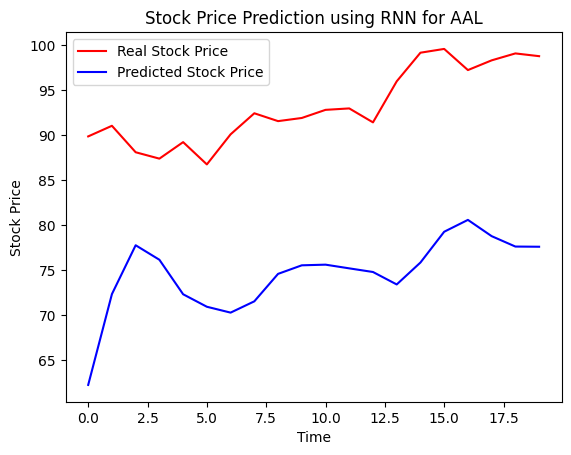

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price_rnn, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction using RNN for '+name)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

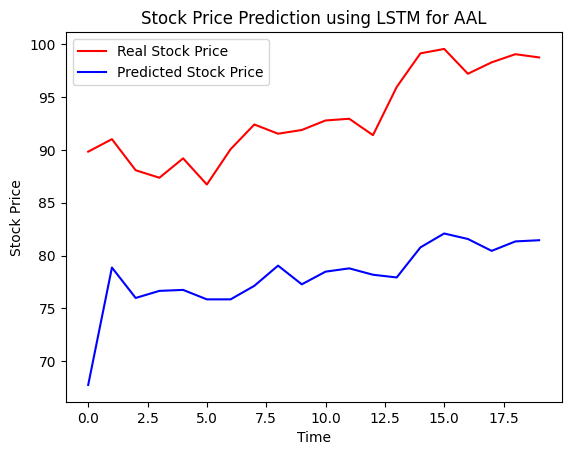

In [23]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price_lstm, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction using LSTM for '+name)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

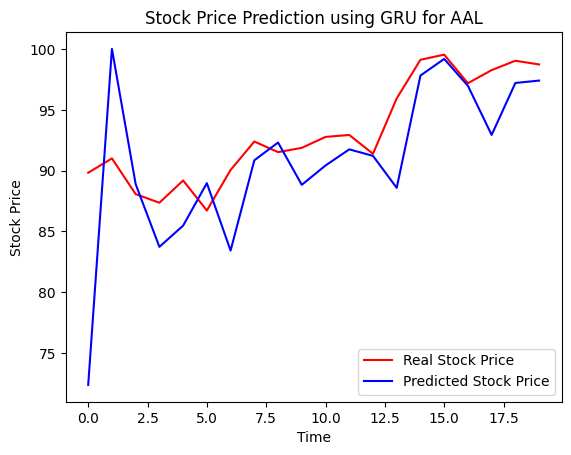

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price_gru, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction using GRU for '+name)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [25]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    return rmse

In [26]:
print("Root mean squared error for simple RNN:",return_rmse(real_stock_price,predicted_stock_price_rnn))
print("Root mean squared error for LSTM:",return_rmse(real_stock_price,predicted_stock_price_lstm))
print("Root mean squared error for GRU:",return_rmse(real_stock_price,predicted_stock_price_gru))

Root mean squared error for simple RNN: 18.955452168817942
Root mean squared error for LSTM: 15.32089479753535
Root mean squared error for GRU: 5.348057092616784


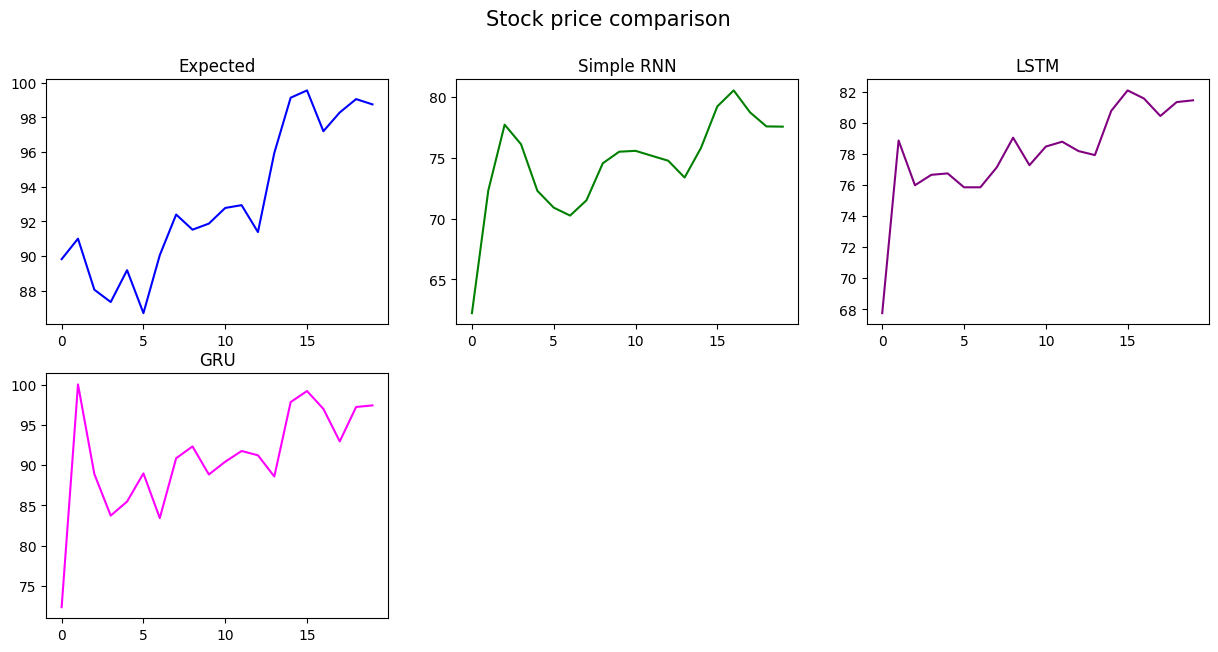

In [27]:
fig = plt.figure(figsize=(15,7))

fig.suptitle('Stock price comparison', fontsize=15)

ax4 = fig.add_subplot(231)
ax4.set_title('Expected')

ax4.plot(real_stock_price,color='blue', label = 'Real Stock Price')

ax1 = fig.add_subplot(232)
ax1.set_title('Simple RNN')

ax1.plot(predicted_stock_price_rnn,color='green', label = 'Predicted Stock Price using Simple RNN')

ax2 = fig.add_subplot(233)
ax2.set_title('LSTM')

ax2.plot(predicted_stock_price_lstm,color='purple', label = 'Predicted Stock Price using LSTM')

ax3 = fig.add_subplot(234)
ax3.set_title('GRU')

ax3.plot(predicted_stock_price_gru,color='magenta', label = 'Predicted Stock Price using GRU')

plt.show()

User Interface

In [28]:
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok   

deb https://ngrok-agent.s3.amazonaws.com buster main
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 https://ngrok-agent.s3.amazonaws.com buster InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 2s (194 kB/s)
Reading package lists... Done
Building dependency tree  

In [30]:
from flask_ngrok import run_with_ngrok
from flask import Flask
from flask import render_template, request

In [31]:
!ngrok config add-authtoken 2P3uyakvsShGSm9RUPHIDv45d8T_3WEweuSZsN9cxSzgbTSY8


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [32]:
!ngrok authtoken 2P3uyakvsShGSm9RUPHIDv45d8T_3WEweuSZsN9cxSzgbTSY8


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [33]:
%mkdir templates -p

In [34]:
%%writefile templates/index.html

<html>
	<head>
		<title>Stock Price Prediction</title>
		<style>
			/* Style for the predict button */
			input[type="submit"] {
				background-color: green;
				color: white;
				padding: 10px 20px;
				border: none;
				border-radius: 5px;
				cursor: pointer;
			}
			label, input[type="text"] {
				display: inline-block;
				margin-bottom: 10px;
			}
		</style>
	</head>
	<body style="background-color:#72bec7;">
		<div style="text-align:center;">
			<img src="https://th.bing.com/th/id/OIP.KZNccnSAWEGkNv8PxgnhcQHaEH?pid=ImgDet&rs=1" alt="Stock Price Prediction" width="700" height="200"><br>
			<h1><u>Stock Price Prediction</u></h1>
		
			<form method="POST">
				<label for="company_name">Enter the company name:</label><br>
				<input type="text" id="cname" name="c_name"><br>
				<label for="days">Prediction for how many days? (Enter in between 1 to 20)</label><br>
				<input type="text" id="predDays" name="pred_Days"><br>
				<label for="predictor">Choose a model to predict:</label><br>
				<select id="type" name="model_type">
					<option value="simplernn">Simple RNN</option>
					<option value="lstm">LSTM</option>
					<option value="gru">GRU</option>
				</select><br><br>
				<input type="submit" value="Predict">
			</form>

		</div>	
	</body>
</html>

Overwriting templates/index.html


In [35]:
%%writefile templates/output.html

<html>
<head>
<title>Predicted Stock Prices</title>
<style>
	table {
		border-collapse: collapse;
	}
	th, td {
		border: 1px solid black;
		padding: 8px;
		text-align: center;
	}
</style>
</head>
<body style="background-color:#72bec7;">
		<div style="text-align:center;">
			<img src="https://th.bing.com/th/id/OIP.KZNccnSAWEGkNv8PxgnhcQHaEH?pid=ImgDet&rs=1" alt="Stock Price Prediction" width="700" height="200"><br>
			<h1><u>Predicted Stock Prices</u></h1>
		
			<table style="margin:auto;">
				<tr>
					<th>Date</th>
					<th>Predicted Stock Price</th>
				</tr>
				{% for x0,x1 in name %}
				<tr>
					<td>{{ x0 }}</td>
					<td>{{ x1[0] }}</td>
				</tr>
				{% endfor %}
			</table>
		</div>	
	</body>
</html>

Overwriting templates/output.html


In [36]:
from datetime import date, timedelta

In [39]:
app = Flask(__name__)

run_with_ngrok(app)  
@app.route('/', methods=['GET','POST'])
def home():
  if request.method == 'GET':
    return render_template('index.html')
  else:
    company_name = request.form['c_name']
    duration = request.form['pred_Days']
    model = request.form['model_type']
   
    if model == 'simplernn':
      results = predicted_stock_price_rnn[:int(duration)].tolist()
    elif model == 'lstm':
      results = predicted_stock_price_lstm[:int(duration)].tolist()
    elif model == 'gru':
      results = predicted_stock_price_lstm[:int(duration)].tolist()
    
    # today = date.today()
    # date_list = [today + timedelta(days=x) for x in range(10)]

    output = zip(date_list, results)

    return render_template('output.html', name=output)

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://aa87-35-243-176-74.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [29/Apr/2023 04:46:05] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Apr/2023 04:46:05] "GET /favicon.ico HTTP/1.1" 404 -


In [38]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://vwu5ml0eaui-496ff2e9c6d22116-5000-colab.googleusercontent.com/
